In [206]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [207]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [208]:
len(x_train)

60000

In [209]:
x_train = x_train / 255
x_test = x_test / 255

In [210]:
len(x_test)

10000

In [211]:
x_train[0].shape

(28, 28)

In [212]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

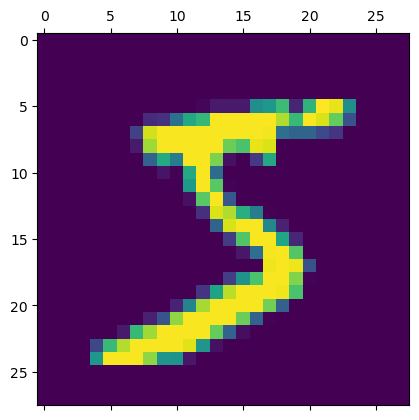

In [213]:
plt.matshow(x_train[0])

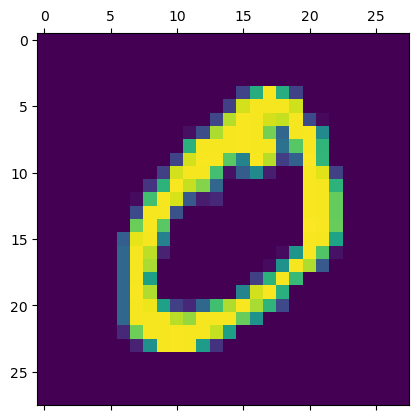

In [214]:
plt.matshow(x_train[1])

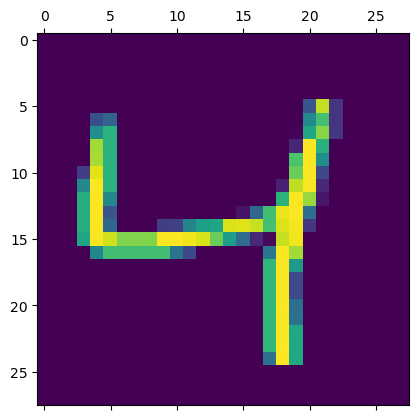

In [215]:
plt.matshow(x_train[2])

In [216]:
y_train[2] # it is expecting 4 at element 2

4

In [217]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [218]:
x_train_flat = x_train.reshape(len(x_train), 784)

In [219]:
x_train_flat.shape

(60000, 784)

In [220]:
x_test_flat = x_test.reshape(len(x_test), 784)

In [221]:
x_test_flat.shape

(10000, 784)

In [222]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(x_train_flat.shape)
print(y_train.shape)

model.fit(x_train_flat, y_train, epochs=5)

(60000, 784)
(60000,)
Epoch 1/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.4667 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.3034 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 797us/step - loss: 0.2830 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.2666 - accuracy: 0.9261


In [223]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 727us/step - loss: 0.2676 - accuracy: 0.9254


[0.2675817608833313, 0.9254000186920166]

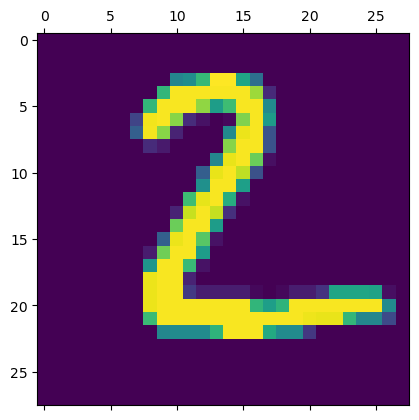

In [224]:
plt.matshow(x_test[1])

In [225]:
y_predicted = model.predict(x_test_flat)

y_predicted[1]

313/313 [==============================] - 0s 614us/step


array([3.6269173e-01, 5.8396482e-03, 9.9915779e-01, 4.5317057e-01,
       5.3408011e-10, 8.5102242e-01, 8.5367596e-01, 9.1262772e-13,
       1.5021633e-01, 2.7086997e-09], dtype=float32)

In [226]:
np.argmax(y_predicted[1])

2

In [227]:
y_predicted_labels = [np.argmax(x) for x in y_predicted]

In [228]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(50.722222222222214, 0.5, 'Actual')

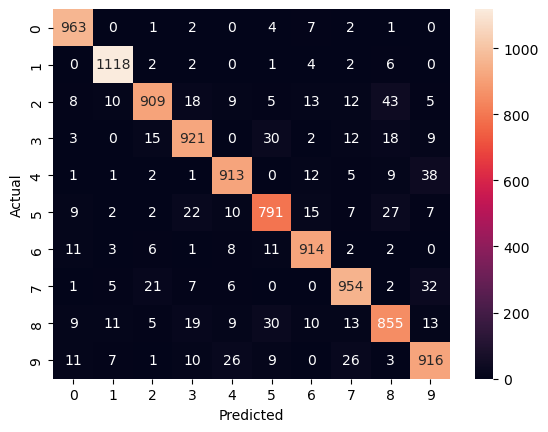

In [229]:
sn.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [230]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   8,   10,  909,   18,    9,    5,   13,   12,   43,    5],
       [   3,    0,   15,  921,    0,   30,    2,   12,   18,    9],
       [   1,    1,    2,    1,  913,    0,   12,    5,    9,   38],
       [   9,    2,    2,   22,   10,  791,   15,    7,   27,    7],
       [  11,    3,    6,    1,    8,   11,  914,    2,    2,    0],
       [   1,    5,   21,    7,    6,    0,    0,  954,    2,   32],
       [   9,   11,    5,   19,    9,   30,   10,   13,  855,   13],
       [  11,    7,    1,   10,   26,    9,    0,   26,    3,  916]])>

In [231]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2633 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1213 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0508 - accuracy: 0.9842


In [232]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 850us/step - loss: 0.0831 - accuracy: 0.9736


[0.08313098549842834, 0.9735999703407288]

In [233]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 0s 716us/step


In [234]:
y_predicted_labels = [np.argmax(x) for x in y_predicted]

Text(50.722222222222214, 0.5, 'Actual')

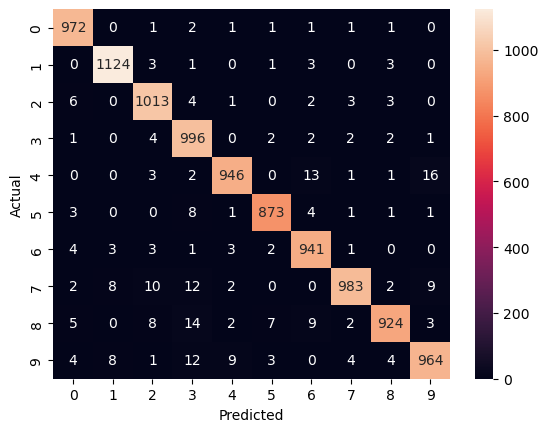

In [235]:
sn.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [242]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\flyin\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible
